<a href="https://colab.research.google.com/github/abraham-30/ProjectStockPrediction/blob/main/stockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/abraham-30/ProjectStockPrediction/main/dataset/BBCA/BBCA.JK.csv

--2024-03-21 07:10:56--  https://raw.githubusercontent.com/abraham-30/ProjectStockPrediction/main/dataset/BBCA/BBCA.JK.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79257 (77K) [text/plain]
Saving to: ‘BBCA.JK.csv’

BBCA.JK.csv         100%[===================>]  77.40K  --.-KB/s    in 0.009s  

2024-03-21 07:10:57 (8.87 MB/s) - ‘BBCA.JK.csv’ saved [79257/79257]



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

from sklearn.metrics import r2_score

import matplotlib.pyplot as plt


In [ ]:
data_stock = pd.read_csv('BBCA.JK.csv')

#DATA VISUALIZATION

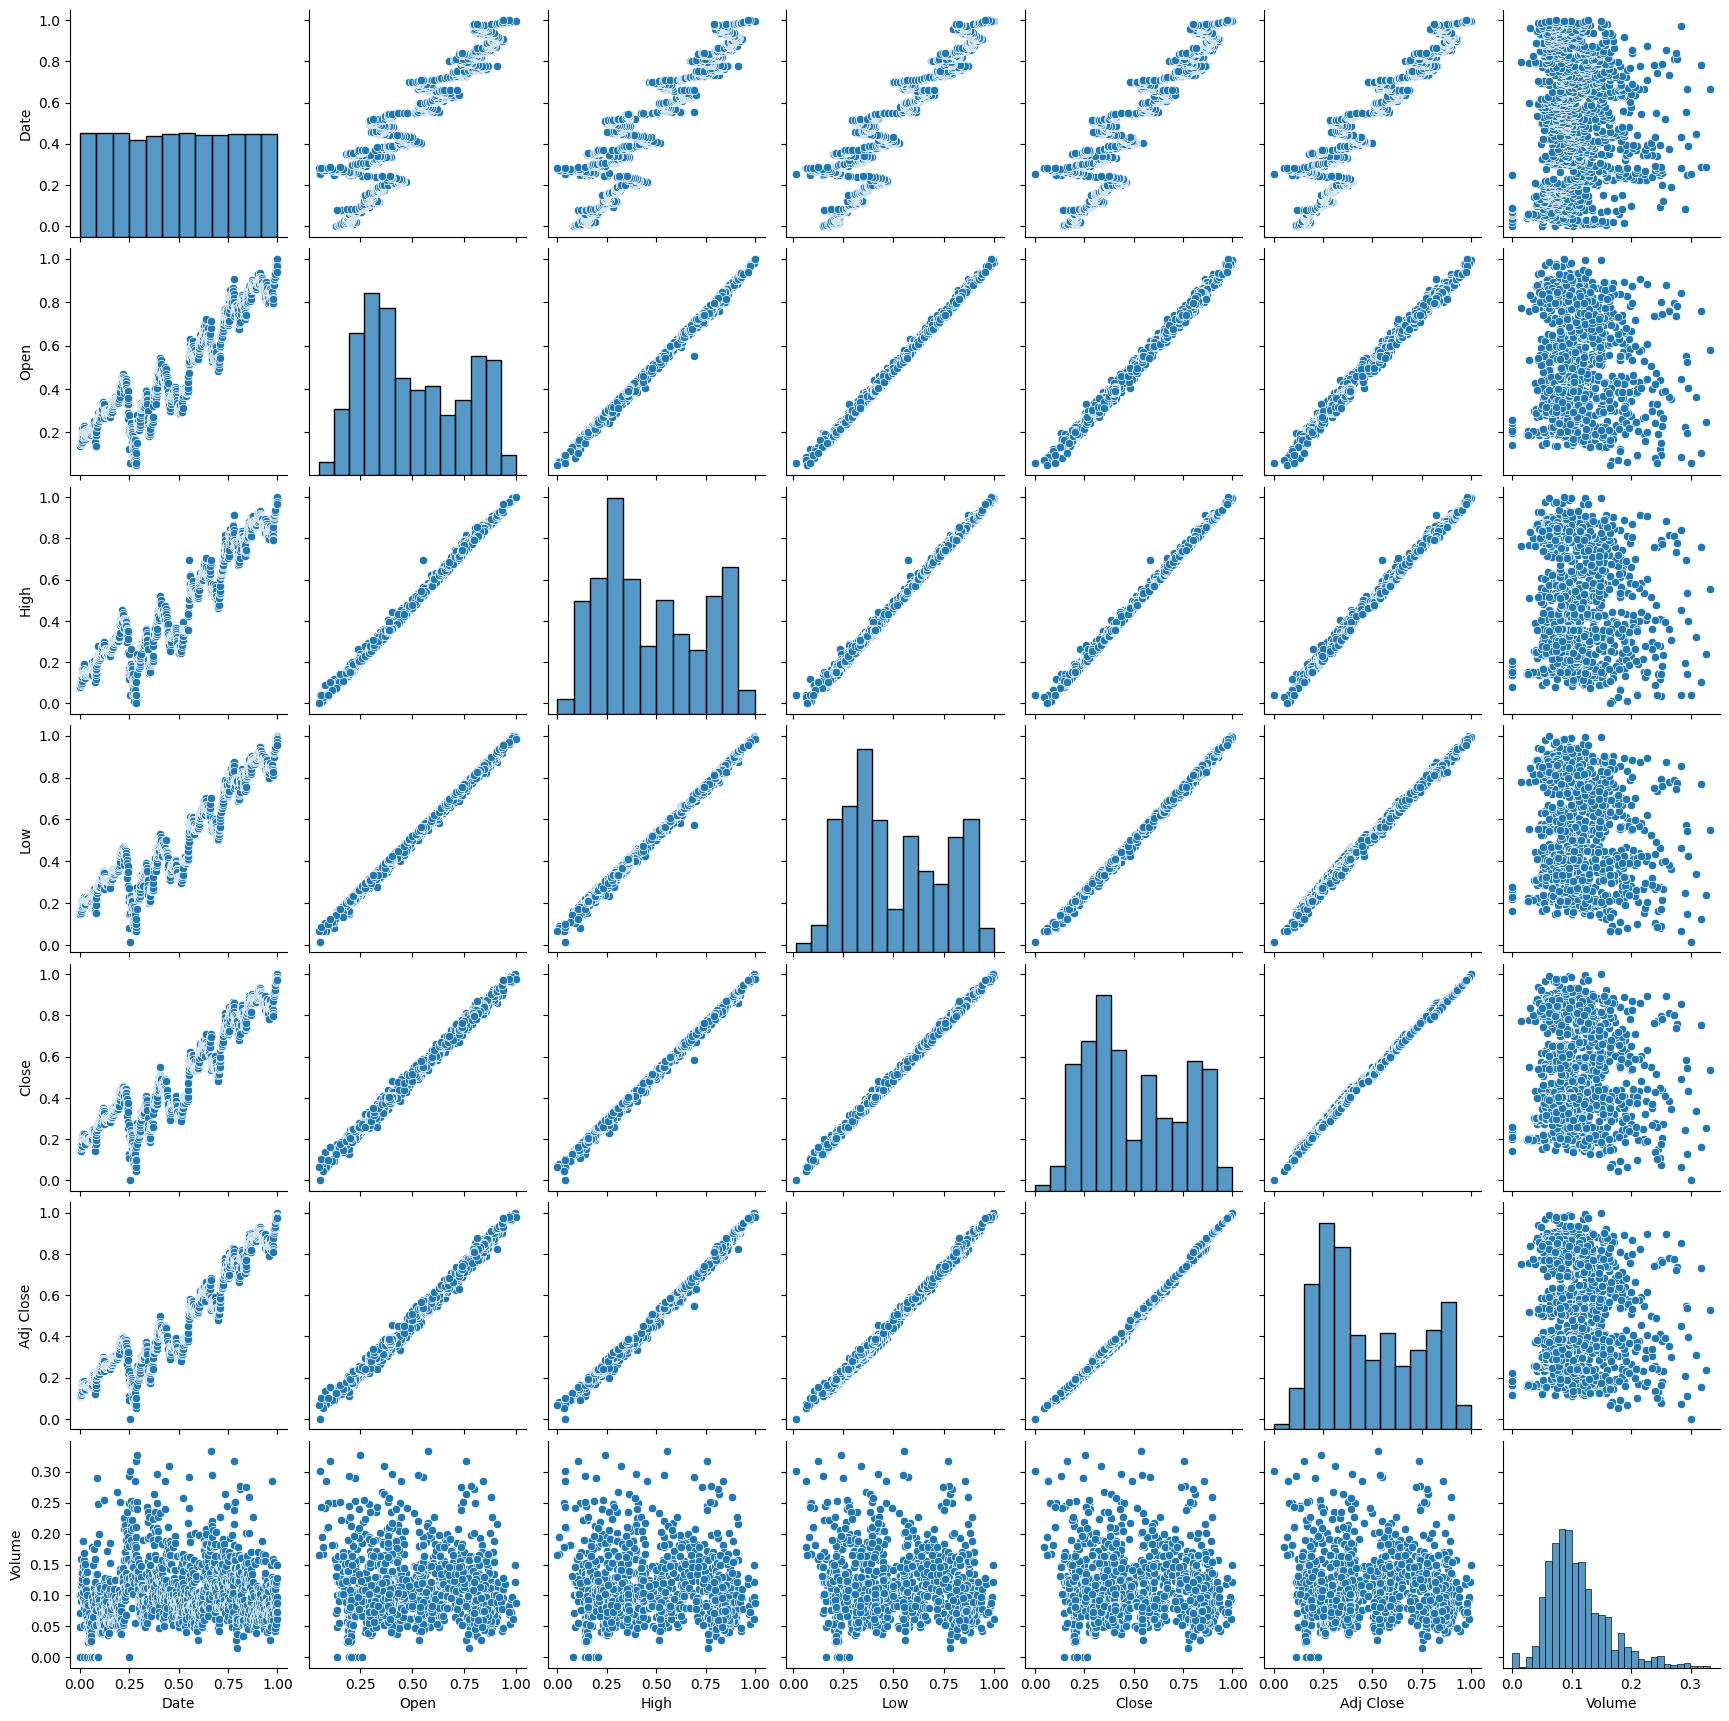

In [ ]:
sb.pairplot(data_stock)

##DATA STRUCTURE

In [ ]:
data_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1248 non-null   object 
 1   Open       1248 non-null   float64
 2   High       1248 non-null   float64
 3   Low        1248 non-null   float64
 4   Close      1248 non-null   float64
 5   Adj Close  1248 non-null   float64
 6   Volume     1248 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.4+ KB


In [ ]:
data_stock.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000
mean,0.500195,0.503128,0.480154,0.512236,0.506987,0.482541,0.109392
std,0.289668,0.238799,0.256892,0.238152,0.240076,0.248286,0.052375
min,0.000000,0.050704,0.000000,0.014953,0.000000,0.000000,0.000000
25%,0.246391,0.306103,0.264322,0.315187,0.307566,0.283502,0.073709
50%,0.501604,0.441784,0.415578,0.449533,0.443609,0.395442,0.098821
75%,0.751203,0.727700,0.733668,0.733645,0.732143,0.712819,0.133790
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.332762


In [ ]:
data_stock.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1243    False
1244    False
1245    False
1246    False
1247    False
Length: 1230, dtype: bool

#DATA PROCESSING

##Removing Duplicates


In [ ]:
data_stock.drop_duplicates(inplace = True)

##Fill NA

In [ ]:
data_num = data_stock.select_dtypes(exclude = object)
data_obj = data_stock.select_dtypes(include = object)

for col in data_stock.columns:
  if col in data_num:
    data_stock[col] = data_stock[col].fillna(data_stock[col].mean)
  elif col in data_obj:
    data_stock[col] = data_stock[col].fillna(data_stock[col].mode()[0])

##Encode Object Type

In [ ]:
encoder = LabelEncoder()

for col in data_obj:
  data_stock[col] = encoder.fit_transform(data_stock[col])

##Normalize Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

normal_scaler = MinMaxScaler(feature_range = (0,1))
normal_scaled_x = normal_scaler.fit_transform(data_stock)
data_stock = pd.DataFrame(normal_scaled_x, columns=data_stock.columns)

##Delete Outliers

In [ ]:
for col in data_stock.columns:
  upper_limit = data_stock[col].mean() + 3 * data_stock[col].std()
  lower_limit = data_stock[col].mean() - 3 * data_stock[col].std()

  data_stock = data_stock.loc[(data_stock[col] <= upper_limit) & (data_stock[col] >= lower_limit)]

##Final Data Check

In [ ]:
data_stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1230 entries, 0 to 1247
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1230 non-null   float64
 1   Open       1230 non-null   float64
 2   High       1230 non-null   float64
 3   Low        1230 non-null   float64
 4   Close      1230 non-null   float64
 5   Adj Close  1230 non-null   float64
 6   Volume     1230 non-null   float64
dtypes: float64(7)
memory usage: 76.9 KB


In [ ]:
data_stock.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000
mean,0.500195,0.503128,0.480154,0.512236,0.506987,0.482541,0.109392
std,0.289668,0.238799,0.256892,0.238152,0.240076,0.248286,0.052375
min,0.000000,0.050704,0.000000,0.014953,0.000000,0.000000,0.000000
25%,0.246391,0.306103,0.264322,0.315187,0.307566,0.283502,0.073709
50%,0.501604,0.441784,0.415578,0.449533,0.443609,0.395442,0.098821
75%,0.751203,0.727700,0.733668,0.733645,0.732143,0.712819,0.133790
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.332762


In [ ]:
data_stock.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1243    False
1244    False
1245    False
1246    False
1247    False
Length: 1230, dtype: bool

#FEATURE SELECTION

##Find Correlation

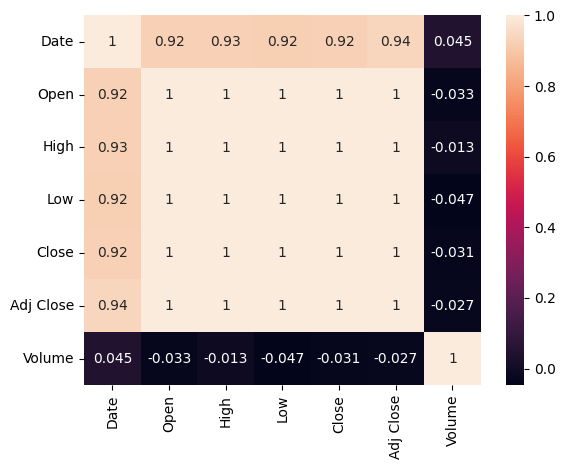

In [ ]:
corr_matrix = data_stock.corr()
sb.heatmap(data = corr_matrix, annot = True)
plt.show()

In [ ]:
abs_corr = abs(corr_matrix['Close'])
high_corr = abs_corr[abs_corr > 0.2]
features = [col for col in data_stock.columns if col in high_corr]

#BUILD MODEL

In [ ]:
X = data_stock[features].drop('Close', axis = 1)
Y = data_stock['Close']

In [ ]:
print(X)

          Date      Open      High       Low  Adj Close
0     0.000000  0.140845  0.080402  0.163551   0.115021
1     0.000802  0.140845  0.089447  0.163551   0.121452
2     0.001604  0.140845  0.084422  0.147664   0.111805
3     0.002406  0.136150  0.081407  0.149533   0.115825
4     0.003208  0.153052  0.105528  0.171963   0.122256
...        ...       ...       ...       ...        ...
1243  0.996792  0.995305  0.994975  0.995327   1.000000
1244  0.997594  0.981221  0.994975  0.990654   0.986761
1245  0.998396  1.000000  1.000000  0.985981   0.977935
1246  0.999198  0.967136  0.974874  0.971963   0.977935
1247  1.000000  0.938967  0.964824  0.957944   0.973522

[1230 rows x 5 columns]


In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

##LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression

LRM = LinearRegression().fit(X_Train, Y_Train)
LRMPredTrain = LRM.predict(X_Train)
LRMPredTest = LRM.predict(X_Test)

###Output

In [ ]:
LRM_Output = pd.DataFrame({'Actual': Y_Test, 'Predicted': LRMPredTest})
print(LRM_Output)

        Actual  Predicted
558   0.362782   0.367068
715   0.591165   0.579475
244   0.369361   0.365734
562   0.324248   0.325289
1181  0.830827   0.838446
...        ...        ...
819   0.600564   0.603743
88    0.234023   0.241411
1161  0.873120   0.874226
298   0.349624   0.344702
383   0.293233   0.291355

[246 rows x 2 columns]


In [ ]:
print("Train Data Set")
print(f"R2 Score: {r2_score(Y_Train, LRMPredTrain)}")
print("Test Data Set")
print(f"R2 Score: {r2_score(Y_Test, LRMPredTest)}")

Train Data Set
R2 Score: 0.9992318895193413
Test Data Set
R2 Score: 0.9994592245495785


##RANDOM FOREST REGRESSOR

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor().fit(X_Train, Y_Train)
RFRPredTrain = RFR.predict(X_Train)
RFRPredTest = RFR.predict(X_Test)

###Output

In [ ]:
RFR_Output = pd.DataFrame({'Actual': Y_Test, 'Predicted': RFRPredTest})
print(RFR_Output)

        Actual  Predicted
558   0.362782   0.377773
715   0.591165   0.577538
244   0.369361   0.364492
562   0.324248   0.336316
1181  0.830827   0.834258
...        ...        ...
819   0.600564   0.609164
88    0.234023   0.233910
1161  0.873120   0.872932
298   0.349624   0.356053
383   0.293233   0.295724

[246 rows x 2 columns]


In [ ]:
from sklearn.metrics import r2_score

print("Train Data Set")
print(f"Accuracy: {r2_score(Y_Train, RFRPredTrain)}")
print("Test Data Set")
print(f"Accuracy: {r2_score(Y_Test, RFRPredTest)}")

Train Data Set
Accuracy: 0.9998916362144582
Test Data Set
Accuracy: 0.9995067525999899


#SVM

In [ ]:
svr = SVR(kernel='linear')
svr.fit(X_Train, Y_Train)
SVMPredTrain = svr.predict(X_Train)
SVMPredTest = svr.predict(X_Test)

## Output

In [ ]:
SVM_output = pd.DataFrame({'Actual': Y_Test, 'Predicted': SVMPredTest})
print(SVM_output)

        Actual  Predicted
558   0.362782   0.365712
715   0.591165   0.535625
244   0.369361   0.325219
562   0.324248   0.339048
1181  0.830827   0.781593
...        ...        ...
819   0.600564   0.569599
88    0.234023   0.214494
1161  0.873120   0.798454
298   0.349624   0.328085
383   0.293233   0.285306

[246 rows x 2 columns]


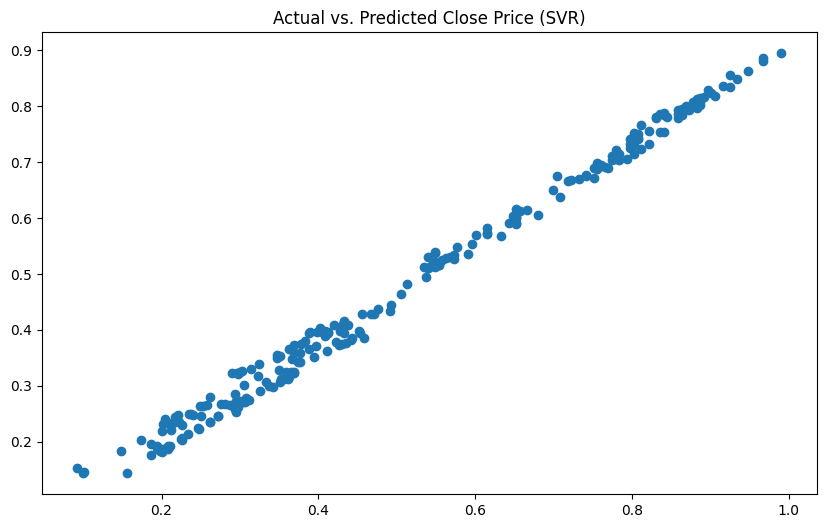

In [ ]:
plt.figure(figsize=(10, 6))
list_color = ['green', 'blue']
plt.scatter(Y_Test, SVMPredTest)
# plt.scatter(sample_indices, SVMPredTest, label='Predicted', color='blue', marker='o')  # Scatter plot for predicted values
# plt.scatter(sample_indices, Y_Test, label='Actual', color='green', marker='x')     # Scatter plot for actual values
# plt.xlabel("Actual Close Price")
# plt.ylabel("Predicted Close Price")
plt.title("Actual vs. Predicted Close Price (SVR)")
plt.show()

## Evaluation

In [ ]:
mse = mean_squared_error(Y_Test, SVMPredTest)
r2_test = r2_score(Y_Test, SVMPredTest)
r2_train = r2_score(Y_Train, SVMPredTrain)

print("Mean Squared Error:", mse)
print("R-squared Test:", r2_test)
print("R-squared Train:", r2_train)

Mean Squared Error: 0.0022617345813908726
R-squared Test: 0.9614426809250719
R-squared Train: 0.9621645955376441


# Graphic

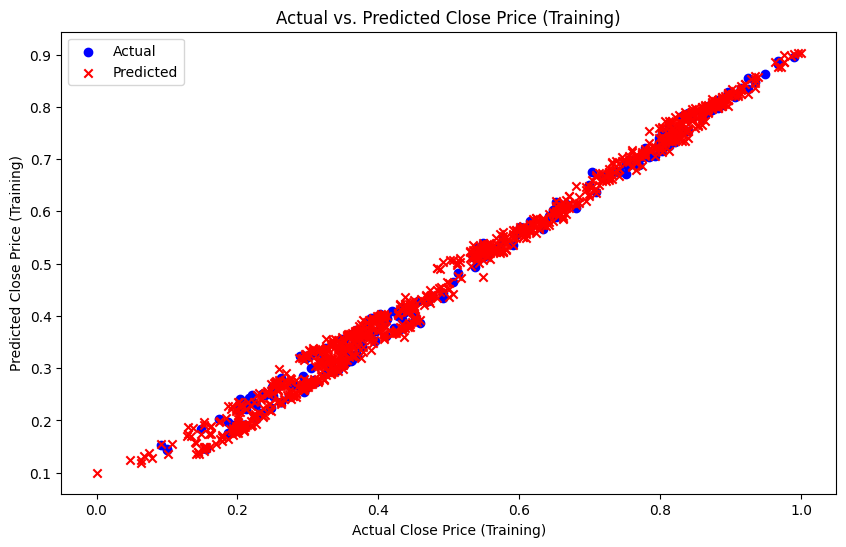

In [ ]:
plt.figure(figsize=(10, 6))

# Plotting actual closing price with blue circles
plt.scatter(Y_Test, SVMPredTest, color='blue', label='Actual', marker='o')

# Plotting predicted closing price with red crosses
plt.scatter(Y_Train, SVMPredTrain, color='red', label='Predicted', marker='x')

plt.xlabel("Actual Close Price (Training)")
plt.ylabel("Predicted Close Price (Training)")
plt.title("Actual vs. Predicted Close Price (Training)")
plt.legend()
plt.show()

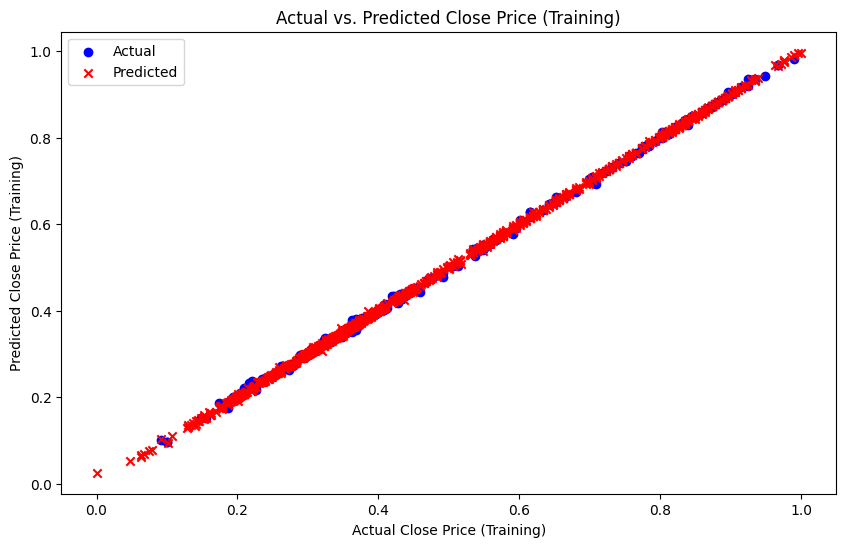

In [ ]:
plt.figure(figsize=(10, 6))

# Plotting actual closing price with blue circles
plt.scatter(Y_Test, RFRPredTest, color='blue', label='Actual', marker='o')

# Plotting predicted closing price with red crosses
plt.scatter(Y_Train, RFRPredTrain, color='red', label='Predicted', marker='x')

plt.xlabel("Actual Close Price (Training)")
plt.ylabel("Predicted Close Price (Training)")
plt.title("Actual vs. Predicted Close Price (Training)")
plt.legend()
plt.show()

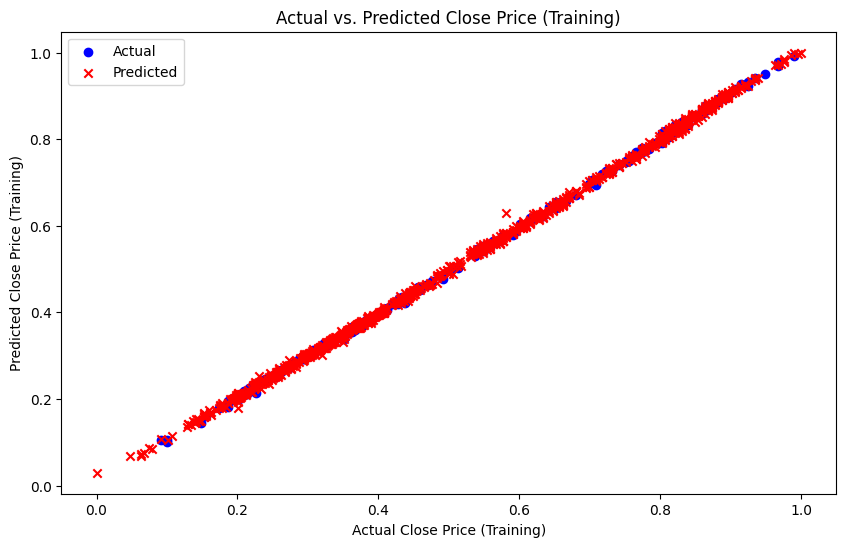

In [ ]:
plt.figure(figsize=(10, 6))

# Plotting actual closing price with blue circles
plt.scatter(Y_Test, LRMPredTest, color='blue', label='Actual', marker='o')

# Plotting predicted closing price with red crosses
plt.scatter(Y_Train, LRMPredTrain, color='red', label='Predicted', marker='x')

plt.xlabel("Actual Close Price (Training)")
plt.ylabel("Predicted Close Price (Training)")
plt.title("Actual vs. Predicted Close Price (Training)")
plt.legend()
plt.show()